In [9]:
%matplotlib inline
import matplotlib


In [10]:

import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import misc
from scipy import ndimage
import os
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from sklearn.utils import shuffle
import h5py

In [49]:
#load data
print ("loading data")
#iterate over directory and get all png images\n
#imageset = np.empty((7704,64,64,3), dtype='float32')

'''
rootdir is the path to a batch folder
'''
rootdir = "C:/Users/nitis/OneDrive/Documents/Deep Learning/Project/datasets/car_batches/3dw/Train/1"
#rootdir = "C:/Users/nitis/OneDrive/Documents/Deep Learning/Project/datasets/car_batches/3dw/Train/1"

def get_image_data(root_dir):
    img_data = np.zeros((36,64,64,3)) # to do start with zero
    cnt = 0
    total_cnt = 0
    k=0
    cur_model =  np.empty((36,64,64,3), dtype='float32')
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            filepath = subdir + os.sep + file
            k += 1
            if filepath.endswith('.png'):
                #print('check')
                if cnt == 36:
                    cnt = 0
                    total_cnt += 1
                    
                    img_data = np.concatenate((img_data,cur_model),axis=0)
                    #print(cur_model)
                    #cur_model =  np.empty((36,64,64,3), dtype='float32')

                cnt += 1
                seq_number = int(filepath.split('-')[-1].split('.')[0])
                cur_model[seq_number] = misc.imread(filepath).astype(np.float32)
                #plt.imshow(cur_model[seq_number]/255)
                #plt.show()
    to_del = range(0,36) #To remove first row of zeros
    print(to_del)
    img_data = np.delete(img_data, to_del, axis=0)
    return img_data
                


loading data


In [50]:
image_data = get_image_data(rootdir)
print(image_data.shape)



range(0, 36)
(17964, 64, 64, 3)


(64, 64, 3)


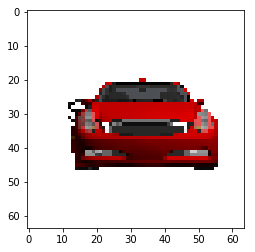

In [51]:
print(image_data[0].shape)

plt.imshow(image_data[0]/255)
plt.show()

In [52]:
def data_store(images,labels,poses,batch_no):
    new_dir= "./data_batch_"+str(batch_no)
    os.mkdir(new_dir)
    
    datafile = os.path.join(new_dir,"data.npy")
    np.save(datafile, images)
    
    posefile = os.path.join(new_dir,"pose.npy")
    np.save(posefile, poses)

    labelfile = os.path.join(new_dir,"label.npy")
    np.save(labelfile, labels)

In [53]:

def get_train(data, pairs_per_model):
    W,H,C = 64,64,3
    images_per_model = 36
    pose_W, pose_H, pose_D = 8,8,36

    total_models = int(data.shape[0] / images_per_model)
    #print(total_models)
    data_train = np.zeros((total_models * pairs_per_model, W,H,C))
    
    data_ = np.zeros((total_models * pairs_per_model,W,H,C))
    labels_ = np.zeros((total_models * pairs_per_model,W,H,C))
    pose = np.zeros((total_models * pairs_per_model,pose_W,pose_H,pose_D))
    
    for cnt in range(total_models ):
        tmp_data = np.zeros((images_per_model * images_per_model,W,H,C))
        tmp_labels = np.zeros((images_per_model * images_per_model,W,H,C))
        tmp_pose = np.zeros((images_per_model * images_per_model, pose_W,pose_H,pose_D))
        for i in range(images_per_model):
            for j in range(images_per_model):
                num = (j-i) % images_per_model
                pose_tmp = np.zeros(images_per_model)
                pose_tmp[num] = 1
                tmp_pose[i*images_per_model + j] = np.broadcast_to(pose_tmp,(pose_W,pose_H,pose_D))
                tmp_data[i*images_per_model + j] = data[cnt*images_per_model + i]
                tmp_labels[i*images_per_model + j] = data[cnt *images_per_model + j]         
        rand_nums = np.random.randint(0,images_per_model * images_per_model - 1,pairs_per_model)
        data_[cnt*pairs_per_model : (cnt+1)*pairs_per_model] = tmp_data[rand_nums]
        labels_[cnt*pairs_per_model : (cnt+1)*pairs_per_model] = tmp_labels[rand_nums]
        pose[cnt*pairs_per_model : (cnt+1)*pairs_per_model] = tmp_pose[rand_nums]
        
    data_, labels_, pose = shuffle(data_, labels_, pose, random_state=0)
    dirname = os.path.basename(rootdir)
    data_store(data_,labels_,pose,dirname)
    

In [54]:
get_train(image_data,100)

In [65]:
pose_ = np.load("./data_batch_1/pose.npy")
data_ = np.load("./data_batch_1/data.npy")
labels_ = np.load("./data_batch_1/label.npy")
print((pose[5][0][0]))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


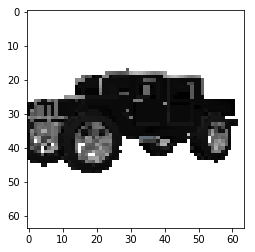

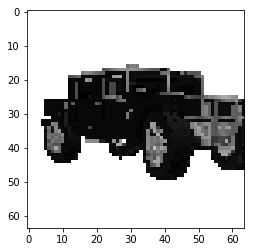

In [72]:

number = 255
print(pose_[number][0][0])
plt.imshow(data_[number][...,::-1]/255)
plt.show()

plt.imshow(labels_[number][...,::-1]/255)
plt.show()

